<a href="https://colab.research.google.com/github/DivyaMeenaSundaram/Deep_Learning_Lab/blob/main/BN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8945 - loss: 0.3535 - val_accuracy: 0.9675 - val_loss: 0.1071
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9734 - loss: 0.0851 - val_accuracy: 0.9726 - val_loss: 0.0870
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.9829 - loss: 0.0566 - val_accuracy: 0.9788 - val_loss: 0.0735
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9864 - loss: 0.0409 - val_accuracy: 0.9759 - val_loss: 0.0803
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9907 - loss: 0.0302 - val_accuracy: 0.9752 - val_loss: 0.0935
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9919 - loss: 0.0254 - val_accuracy: 0.9791 - val_loss: 0.0824
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9932 - loss: 0.0203 - val_accuracy: 0.9815 - val_loss: 0.0807
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9936 - loss: 0.01

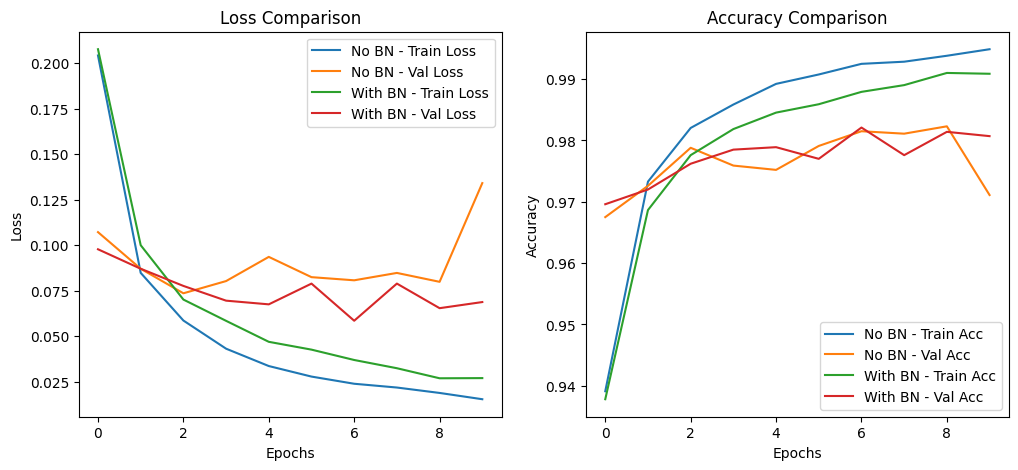

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, ReLU
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values to [0,1]

# Function to build the model (with or without Batch Normalization)
def build_model(with_bn=False):
    model = Sequential()

    # Flatten input
    model.add(Flatten(input_shape=(28, 28)))

    # First dense layer
    model.add(Dense(256))
    if with_bn:
        model.add(BatchNormalization())  # Apply Batch Normalization
    model.add(ReLU())

    # Second dense layer
    model.add(Dense(128))
    if with_bn:
        model.add(BatchNormalization())  # Apply Batch Normalization
    model.add(ReLU())

    # Output layer
    model.add(Dense(10, activation='softmax'))

    # Compile model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# Train both models (without and with Batch Normalization)
model_no_bn = build_model(with_bn=False)
history_no_bn = model_no_bn.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=1)

model_with_bn = build_model(with_bn=True)
history_with_bn = model_with_bn.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=1)

# Function to plot training results
def plot_results(history_no_bn, history_with_bn):
    plt.figure(figsize=(12, 5))

    # Plot loss comparison
    plt.subplot(1, 2, 1)
    plt.plot(history_no_bn.history['loss'], label='No BN - Train Loss')
    plt.plot(history_no_bn.history['val_loss'], label='No BN - Val Loss')
    plt.plot(history_with_bn.history['loss'], label='With BN - Train Loss')
    plt.plot(history_with_bn.history['val_loss'], label='With BN - Val Loss')
    plt.title('Loss Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy comparison
    plt.subplot(1, 2, 2)
    plt.plot(history_no_bn.history['accuracy'], label='No BN - Train Acc')
    plt.plot(history_no_bn.history['val_accuracy'], label='No BN - Val Acc')
    plt.plot(history_with_bn.history['accuracy'], label='With BN - Train Acc')
    plt.plot(history_with_bn.history['val_accuracy'], label='With BN - Val Acc')
    plt.title('Accuracy Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# Display results
plot_results(history_no_bn, history_with_bn)
